Predictions to be answered in this notebook: 

1. According to certain habits of a person, how high is the risk of having diabetes?
2. According to certain symptoms of a person, how high is the risk of having diabetes?
3. Prediction on hospital readmission

Datasets used: 

1. https://www.kaggle.com/tigganeha4/diabetes-dataset-2019
2. https://www.kaggle.com/sujan97/early-stage-diabetes-2020
3. https://www.kaggle.com/brandao/diabetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sn



#### Diabetes Risk according to habits 

like smoking, fitness, bmi...

In [2]:
data_1 = pd.read_csv(r"C:\Users\Anna\Desktop\EDX_DataScience\Week3\Week-9-final Project\archive_DiabetsHabits\diabetes_dataset__2019.csv")

In [3]:
data_1= data_1.dropna()

In [4]:
# drop or rename variables / column
data_1.loc[(data_1.Diabetic == " no")] = "no"

Age_drop = data_1[data_1.Age == "no"].index
data_1.drop(Age_drop, inplace = True)

Med_drop = data_1[data_1.RegularMedicine == "o"].index
data_1.drop(Med_drop, inplace = True)

data_1.loc[(data_1.BPLevel == "High")] = "high"
data_1.loc[(data_1.BPLevel == 'normal ')] = "normal"
data_1.loc[(data_1.BPLevel == 'Low')] = "low"

Preg_drop_H = data_1[data_1.Pregancies == "high"].index
data_1.drop(Preg_drop_H, inplace = True)

Preg_drop_N = data_1[data_1.Pregancies == "normal"].index
data_1.drop(Preg_drop_N, inplace = True)

Preg_drop_L = data_1[data_1.Pregancies == "low"].index
data_1.drop(Preg_drop_L, inplace = True)

data_1.drop(["Pdiabetes"], axis = 1, inplace= True)
data_1.drop(["SoundSleep"], axis = 1, inplace= True)
data_1.drop(["BPLevel"], axis = 1, inplace= True)




In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 951
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               895 non-null    object
 1   Gender            895 non-null    object
 2   Family_Diabetes   895 non-null    object
 3   highBP            895 non-null    object
 4   PhysicallyActive  895 non-null    object
 5   BMI               895 non-null    object
 6   Smoking           895 non-null    object
 7   Alcohol           895 non-null    object
 8   Sleep             895 non-null    object
 9   RegularMedicine   895 non-null    object
 10  JunkFood          895 non-null    object
 11  Stress            895 non-null    object
 12  Pregancies        895 non-null    object
 13  UriationFreq      895 non-null    object
 14  Diabetic          895 non-null    object
dtypes: object(15)
memory usage: 111.9+ KB


In [6]:
# dummy variables

#Age with ordinal number encoding, since natural ordered relationship is given
dict_age = {'less than 40':0, '40-49':1, '50-59':2, '60 or older':3 }
data_age = data_1.Age.map(dict_age)

#Gender
dict_gender = {"Male":0, "Female":1}
data_ageM = data_1.Gender.map(dict_gender)

#Family Diabetes
dict_fam = {"no":0, "yes":1}
data_fam = data_1.Family_Diabetes.map(dict_fam)

#High blood pressure
dict_bp = {"no":0, "yes":1}
data_bp = data_1.highBP.map(dict_bp)

#fitness 
dict_fit = {"none": 0, 'one hr or more':3, 'less than half an hr':1, 'more than half an hr':2}
data_fit = data_1.PhysicallyActive.map(dict_fit)

#BMI
data_bmi = data_1.BMI.astype(int)

#Smoking
dict_smok = {"no":0, "yes":1}
data_smok = data_1.Smoking.map(dict_smok)

#Smoking
dict_alc = {"no":0, "yes":1}
data_alc = data_1.Alcohol.map(dict_alc)

#Sleep 
data_sleep = data_1.Sleep.astype(int)

#Regular Medicine
dict_med = {"no":0, "yes":1}
data_med = data_1.RegularMedicine.map(dict_med)

#Junk Food
dict_jf = {"occasionally": 0, 'often':1, 'very often':2, 'always':3}
data_jf = data_1.JunkFood.map(dict_jf)

#Stress
dict_stress = {'sometimes':1, 'not at all':0, 'very often':2, 'always':3}
data_stress = data_1.Stress.map(dict_stress)

#Pregnanicies
data_preg = data_1.Pregancies.astype(int)

#Urination frequencies
dict_urin = {'not much':0, 'quite often':1}
data_urin = data_1.UriationFreq.map(dict_urin)

#Diabetic
dict_diabetic = {"no":0, "yes":1}
data_diabetic = data_1.Diabetic.map(dict_diabetic)


In [7]:
X = pd.concat([data_age, data_ageM, data_fam, data_bp, data_fit, data_bmi, data_smok, data_alc, data_sleep, data_med, data_jf, data_stress, data_preg, data_urin], axis = 1, verify_integrity = True)

y = data_diabetic

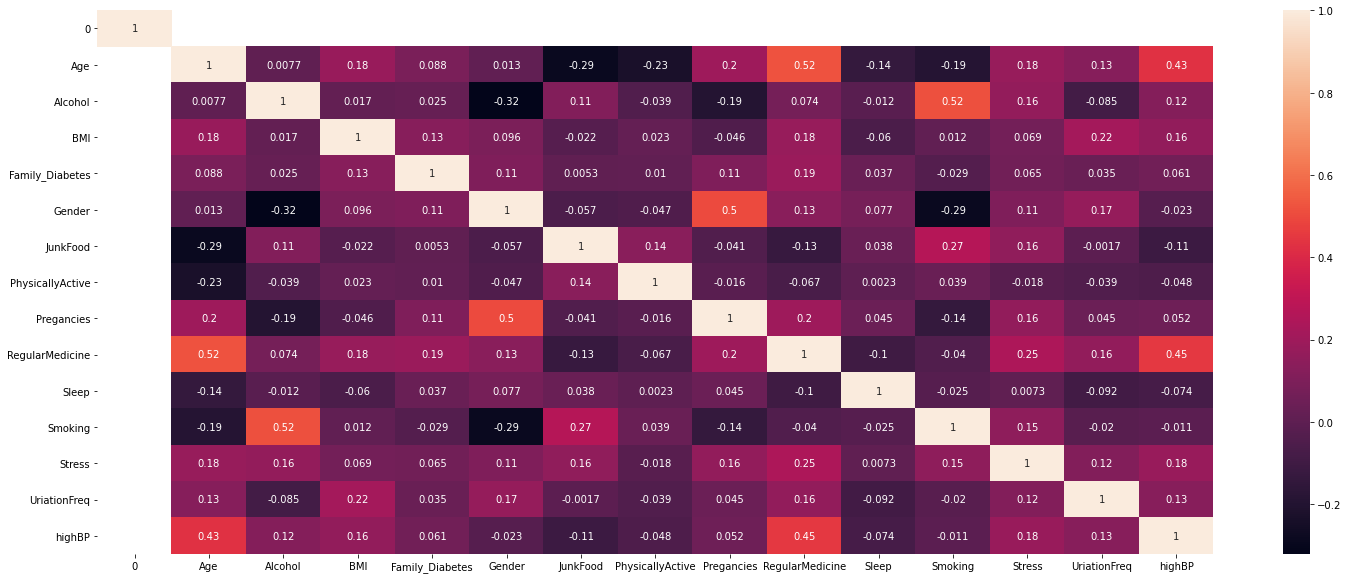

In [8]:
data1_all = pd.concat([X,y])
corr = data1_all.corr()

plt.figure(figsize = (25,10))
sn.heatmap(corr, annot=True)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33)

In [10]:
# ML with Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

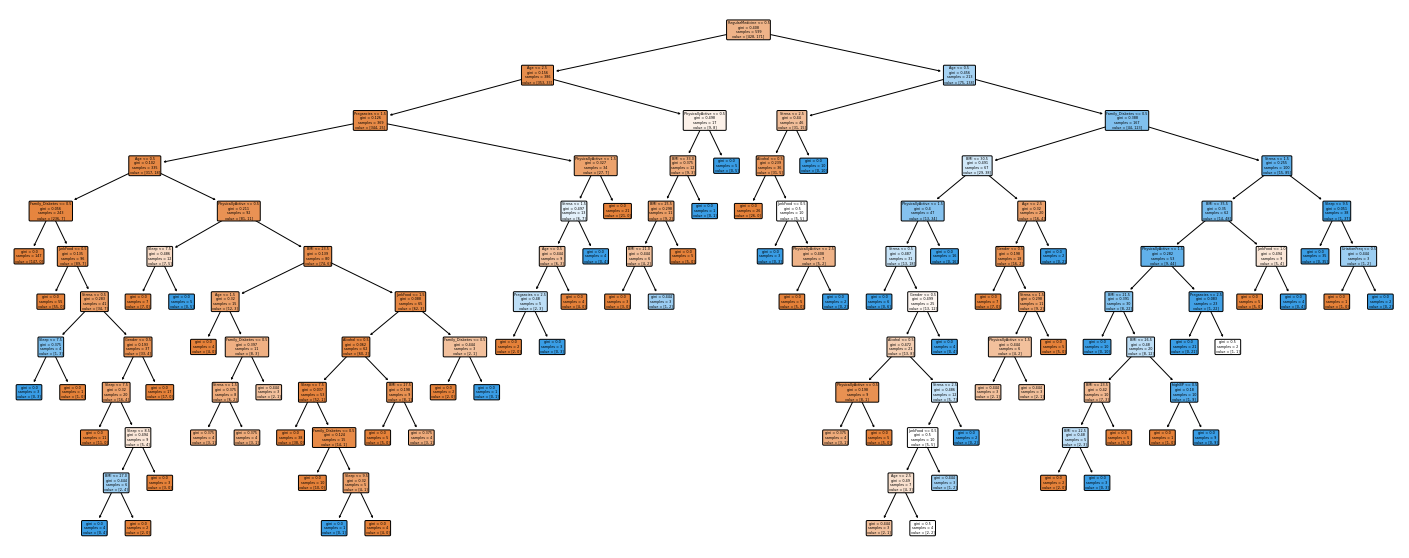

In [13]:
featurenames = list(data_1.columns)
featurenames.remove("Diabetic")

plt.figure(figsize=(25,10))
a = plot_tree(dtree, feature_names=featurenames, filled = True, rounded=True)

In [14]:
predictions[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
y_test[:10]

734    0
489    0
521    0
833    0
528    0
229    0
633    0
652    0
878    0
292    0
Name: Diabetic, dtype: int64

In [16]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9527027027027027

In [17]:
X.iloc[0]

Age                  2
Gender               0
Family_Diabetes      0
highBP               1
PhysicallyActive     3
BMI                 39
Smoking              0
Alcohol              0
Sleep                8
RegularMedicine      0
JunkFood             0
Stress               1
Pregancies           0
UriationFreq         0
Name: 0, dtype: int64

In [26]:
jan = [[0, 0, 1, 0, 1, 19, 0, 0, 8, 0, 0, 1, 0, 1]]
anna = [[0,1,1,0,1,24,0,0,9,0,0,1,0,1]]
papa = [[2,0,1,1,1,35,0,1,7,1,1,2,0,0]]

In [27]:
predictions_jan = dtree.predict(jan)
predictions_anna = dtree.predict(anna)
predictions_papa = dtree.predict(papa)

In [28]:
predictions_jan

array([0], dtype=int64)

In [21]:
predictions_anna

array([0], dtype=int64)

In [25]:
predictions_papa

array([1], dtype=int64)